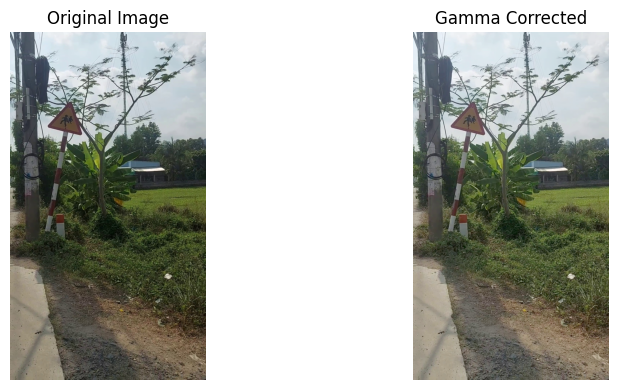

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # Dùng trong Google Colab để tải file

# Đọc ảnh gốc
img = cv2.imread('/content/sample_data/frame_0547.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển từ BGR sang RGB

# Hàm áp dụng Gamma Correction
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Áp dụng gamma correction
gamma_corrected = adjust_gamma(img, gamma=1.3)

# Hiển thị ảnh trước và sau khi xử lý
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gamma Corrected")
plt.imshow(gamma_corrected)
plt.axis("off")

plt.tight_layout()
plt.show()

# Chuyển ảnh đã chỉnh gamma sang định dạng BGR để lưu bằng OpenCV
output_bgr = cv2.cvtColor(gamma_corrected, cv2.COLOR_RGB2BGR)
output_path = "/content/gamma_corrected.jpg"
cv2.imwrite(output_path, output_bgr)

# Tải ảnh về (chỉ hoạt động trong Google Colab)
files.download(output_path)


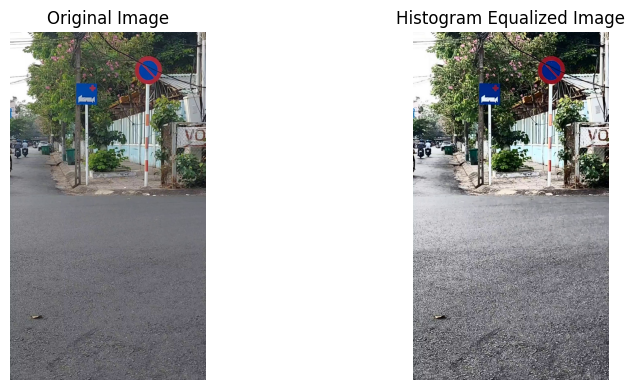

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files  # Chỉ dùng khi chạy trên Google Colab

# Đọc ảnh màu (RGB)
img = cv2.imread('/content/sample_data/frame_0582.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Chuyển sang không gian màu YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(img_ycrcb)

# Áp dụng histogram equalization cho kênh Y (độ sáng)
y_eq = cv2.equalizeHist(y)

# Gộp lại các kênh và chuyển về RGB
img_eq = cv2.merge((y_eq, cr, cb))
img_eq_rgb = cv2.cvtColor(img_eq, cv2.COLOR_YCrCb2RGB)

# Hiển thị ảnh trước và sau
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(img_eq_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

# Lưu ảnh đã xử lý (chuyển lại sang BGR để lưu đúng màu)
img_eq_bgr = cv2.cvtColor(img_eq_rgb, cv2.COLOR_RGB2BGR)
output_path = "/content/hist_eq_image.jpg"
cv2.imwrite(output_path, img_eq_bgr)

# Tải ảnh về nếu đang chạy trong Google Colab
files.download(output_path)


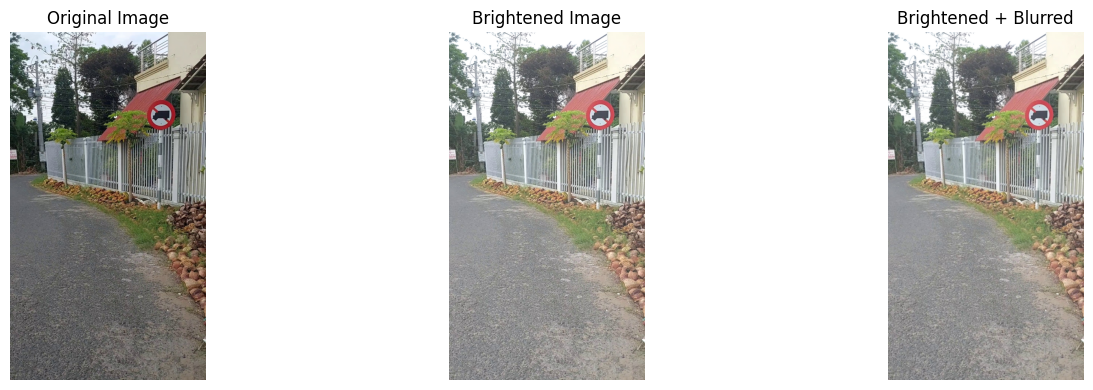

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # Dùng để tải file nếu chạy trên Colab

# Đọc ảnh gốc và chuyển sang RGB để hiển thị đúng màu
img = cv2.imread('/content/sample_data/frame_0949.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ======= 1. Tăng sáng ảnh bằng phép cộng tuyến tính ==========
bright_img = cv2.convertScaleAbs(img_rgb, alpha=1, beta=50)  # beta: độ sáng

# ======= 2. Làm mờ nhẹ để giảm nhiễu ==========
blurred_img = cv2.GaussianBlur(bright_img, (5, 5), 0)

# ======= 3. Hiển thị kết quả ==========
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Brightened Image")
plt.imshow(bright_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Brightened + Blurred")
plt.imshow(blurred_img)
plt.axis('off')

plt.tight_layout()
plt.show()

# ======= 4. Lưu và tải ảnh cuối cùng ==========
# Chuyển ảnh kết quả từ RGB sang BGR để lưu đúng màu
output_img_bgr = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2BGR)
output_path = '/content/bright_blur_image.jpg'
cv2.imwrite(output_path, output_img_bgr)

# Tải về nếu dùng Google Colab
files.download(output_path)
